# Glass Dataset (multiclass imbalace)

# Load library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [32]:
url = 'https://raw.githubusercontent.com/Jessadakorn-pun/Dataset/main/glass.csv'
df = pd.read_csv(url)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

<Axes: ylabel='Type'>

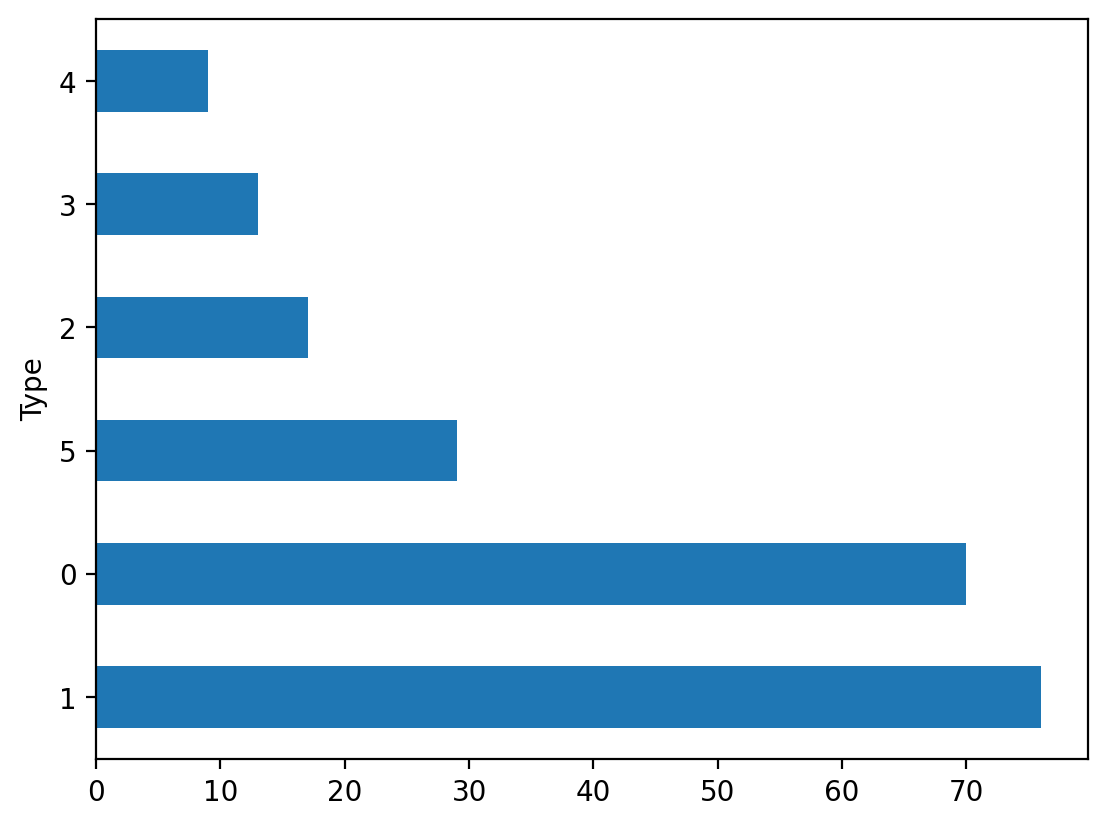

In [34]:
df.Type.value_counts().plot(kind='barh')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [36]:
X = df[df.columns[~df.columns.str.contains('Type')]]
y = df.Type

In [37]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

## Spliting dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (149, 9)
X_test.shape = (65, 9)


## Pipe line

In [39]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = SVC(random_state=1)

pipe = Pipeline([
    ('scl', scl),
    ('pca', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf', SVC(random_state=1))])

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('clf', SVC(random_state=1))])

# Visualized confusion metrix

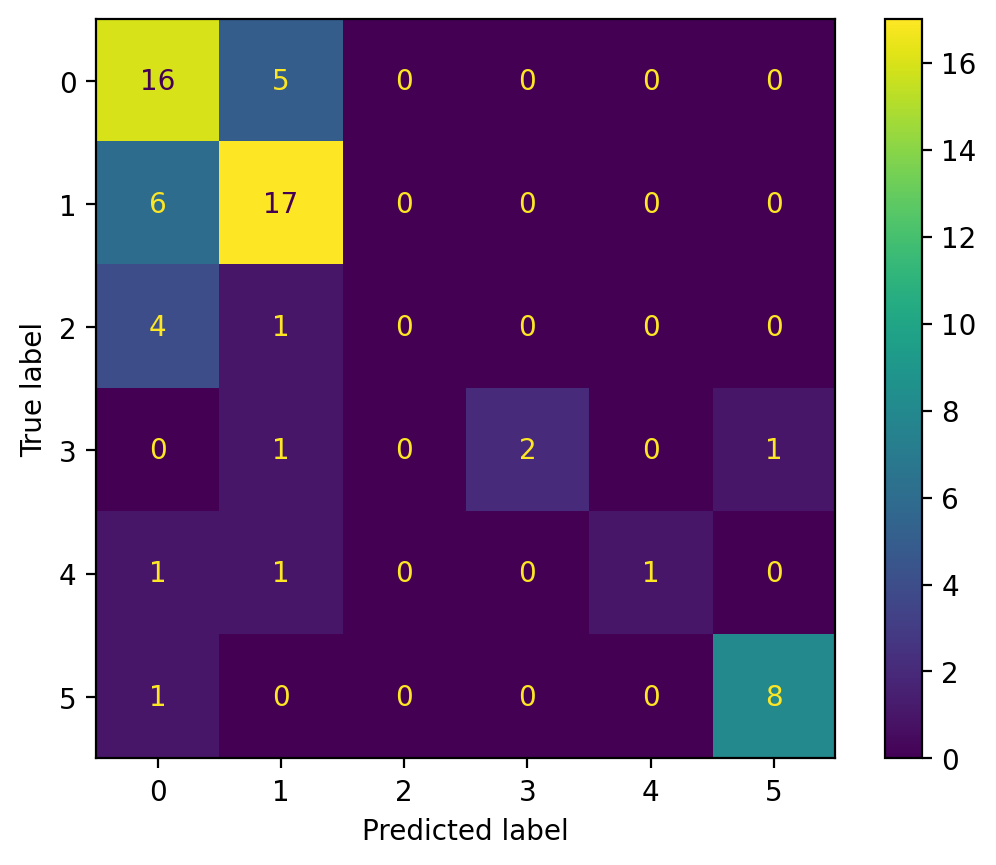

In [41]:
y_pred = pipe.predict(X_test)
## confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [42]:
## Classificaiton report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65        21
           1       0.68      0.74      0.71        23
           2       0.00      0.00      0.00         5
           3       1.00      0.50      0.67         4
           4       1.00      0.33      0.50         3
           5       0.89      0.89      0.89         9

    accuracy                           0.68        65
   macro avg       0.69      0.54      0.57        65
weighted avg       0.66      0.68      0.65        65



/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Grid search cv for optimized precision score

In [43]:
## using grid search for low recall class
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [44]:
pipe.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('pca', PCA(n_components=0.9)),
  ('clf', SVC(random_state=1))],
 'verbose': False,
 'scl': StandardScaler(),
 'pca': PCA(n_components=0.9),
 'clf': SVC(random_state=1),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.9,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'clf__C': 1.0,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': 1,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [45]:
X_train.shape[0]

149

In [46]:
param_range = [.0001, .001, .01, .1, 1, 10, 100, 1000]

set1 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['linear']
    
}

set2 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['poly']
    
}

set3 = {
    'clf__C':param_range,
    'clf__gamma':param_range,
    'clf__kernel':['rbf']
    
}

param_grid = [set1, set2, set3]

In [47]:
scorer = make_scorer(metrics.precision_score, average='micro')

gs = GridSearchCV(
    estimator=pipe,
    cv=6,
    scoring=scorer,
    n_jobs=-1,
    param_grid=param_grid
)
gs

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(precision_score, average=micro))

In [48]:
gs.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['poly']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                     1000],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(precision_score, average=micro))

In [49]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__gamma,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
178,0.002930,0.001656,0.002872,0.002043,100,0.01,rbf,"{'clf__C': 100, 'clf__gamma': 0.01, 'clf__kern...",0.64,0.72,0.72,0.68,0.80,0.666667,0.704444,0.051304,1
186,0.003337,0.001519,0.001660,0.001205,1000,0.01,rbf,"{'clf__C': 1000, 'clf__gamma': 0.01, 'clf__ker...",0.72,0.64,0.64,0.68,0.72,0.708333,0.684722,0.034324,2
171,0.003092,0.001733,0.001527,0.000975,10,0.1,rbf,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",0.68,0.60,0.64,0.64,0.88,0.666667,0.684444,0.090976,3
187,0.004784,0.002990,0.002095,0.001081,1000,0.1,rbf,"{'clf__C': 1000, 'clf__gamma': 0.1, 'clf__kern...",0.64,0.64,0.64,0.60,0.76,0.625000,0.650833,0.050861,4
108,0.004895,0.002541,0.002329,0.002631,10,1,poly,"{'clf__C': 10, 'clf__gamma': 1, 'clf__kernel':...",0.68,0.64,0.64,0.60,0.60,0.708333,0.644722,0.039445,5


In [50]:
print(f'best micro average precision score : {gs.best_score_}')
print(f'best hyper parameter : {gs.best_params_}')

best micro average precision score : 0.7044444444444445
best hyper parameter : {'clf__C': 100, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


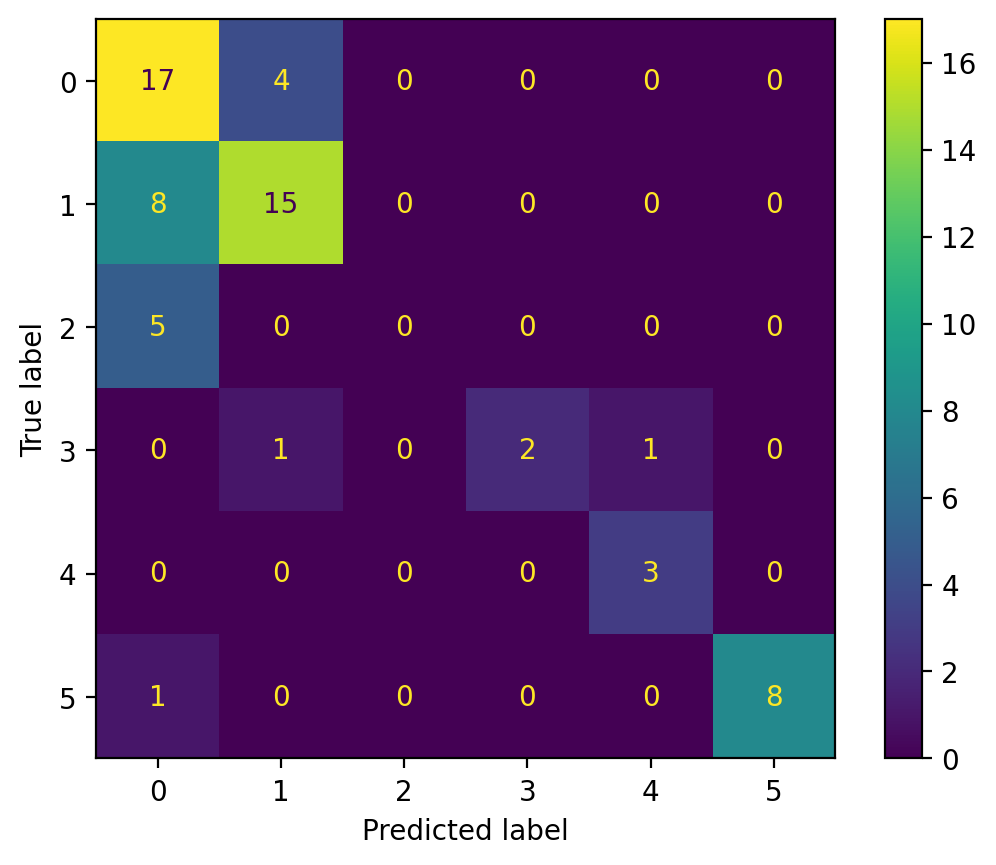

In [51]:
y_pred = gs.predict(X_test)
## confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [52]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65        21
           1       0.75      0.65      0.70        23
           2       0.00      0.00      0.00         5
           3       1.00      0.50      0.67         4
           4       0.75      1.00      0.86         3
           5       1.00      0.89      0.94         9

    accuracy                           0.69        65
   macro avg       0.67      0.64      0.64        65
weighted avg       0.68      0.69      0.67        65



/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
